In [1]:
## one hot encoding을 할 때 주의할 점
## 모델에 적용할 때, shape가 다르기 때문에 Shape 에러 주의한다.
## ex) ValueError: Shapes (None, 3) and (None, 900, 3) are incompatible

# One hot encoding실습

In [2]:
import numpy as np

In [3]:
# 입력 문장 (모델 입력)
raw_inputs = [
             "나는 학생 입니다",
             "나는 좋은 선생님 입니다",
             "당신은 매우 좋은 선생님 입니다"
]

# 정답 학생(1) 기타(0)
raw_labels = [1, 0, 0]

In [4]:
words = []
for s in raw_inputs:
    words.extend(s.split()) # extend : s를 추가한다.

In [5]:
print(words)

['나는', '학생', '입니다', '나는', '좋은', '선생님', '입니다', '당신은', '매우', '좋은', '선생님', '입니다']


In [6]:
## 중복된 단어를 제거
words = list(dict.fromkeys(words))
print(words)

['나는', '학생', '입니다', '좋은', '선생님', '당신은', '매우']


In [7]:
## 단어장의 특수한 토큰을 삽입
word_to_id = {"<PAD>" : 0, "<UNK>" : 1}

for w in words:
    word_to_id[w] = len(word_to_id)
    print(word_to_id)

{'<PAD>': 0, '<UNK>': 1, '나는': 2}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6, '당신은': 7}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6, '당신은': 7, '매우': 8}


In [8]:
word_to_id.items()

dict_items([('<PAD>', 0), ('<UNK>', 1), ('나는', 2), ('학생', 3), ('입니다', 4), ('좋은', 5), ('선생님', 6), ('당신은', 7), ('매우', 8)])

In [9]:
id_to_words = {i : w for w, i in word_to_id.items()}
print(id_to_words)

{0: '<PAD>', 1: '<UNK>', 2: '나는', 3: '학생', 4: '입니다', 5: '좋은', 6: '선생님', 7: '당신은', 8: '매우'}


In [10]:
train_inputs = []
for s in raw_inputs:
    row = [word_to_id[w] for w in s.split()]

    # padding 
    row += [0] * (5-len(row))
    train_inputs.append(row)

train_inputs = np.array(train_inputs)
print(train_inputs)

[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]]


In [11]:
train_inputs.shape

(3, 5)

In [12]:
# one-hot matrix 생성
onehot_matrix = np.eye(len(word_to_id))
print(onehot_matrix)
print(onehot_matrix.shape) # 단어장은 7개인데, 0, 1번째 row는 token을 의미한다.

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(9, 9)


In [13]:
# train_inputs = 
# [[2 3 4 0 0]
#  [2 5 6 4 0]
#  [7 8 5 6 4]]

train_onehot = onehot_matrix[train_inputs]
print(train_onehot)

# one-hot의 문제점은 너무 많은 0의 데이터가 있어, 용량을 너무 낭비한다.
# 또한 다른 단어와의 상관관계를 확률로 표현할 수 없는 단점이 있다.

[[[0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]]]


In [14]:
train_onehot.shape

(3, 5, 9)

In [15]:
# one hot coding -> sequence 형태로 복원 가능
print(np.argmax(train_onehot, axis = -1))

[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]]


In [16]:
# 모델에 집어 넣기 전에 squence형태로 복원한다.
x = np.argmax(train_onehot, axis = -1)
print(x)

[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]]


In [17]:
import tensorflow as tf
import tensorflow.keras.layers as L

In [18]:
x_len = train_onehot.shape
print(x_len)

(3, 5, 9)


In [19]:
inp = tf.convert_to_tensor(x, dtype=tf.int32)
inp_len = tf.convert_to_tensor(x_len, dtype=tf.int32)

print(inp)
print(inp_len)

tf.Tensor(
[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]], shape=(3, 5), dtype=int32)
tf.Tensor([3 5 9], shape=(3,), dtype=int32)


In [20]:
# embedding 레이어를 넣어 확률로 전환한다.
# squence -> tensor(sequence) ->  Embedding으로 구한 확률[0.03256061  0.01576162  0.03259503]]
vocab_size = 1000
dim = 3
embed = L.Embedding(vocab_size, dim)

In [21]:
print(embed(inp))

tf.Tensor(
[[[-0.01853748 -0.02179006 -0.02187743]
  [-0.03280103 -0.04574686 -0.03237565]
  [ 0.00602206 -0.01267817  0.00334324]
  [-0.03041236  0.02578573 -0.02092688]
  [-0.03041236  0.02578573 -0.02092688]]

 [[-0.01853748 -0.02179006 -0.02187743]
  [ 0.03682567 -0.04225336  0.02576235]
  [ 0.01356771  0.00446314  0.04162581]
  [ 0.00602206 -0.01267817  0.00334324]
  [-0.03041236  0.02578573 -0.02092688]]

 [[ 0.04430605  0.04109422 -0.04701886]
  [-0.04831142  0.02664261  0.04560157]
  [ 0.03682567 -0.04225336  0.02576235]
  [ 0.01356771  0.00446314  0.04162581]
  [ 0.00602206 -0.01267817  0.00334324]]], shape=(3, 5, 3), dtype=float32)


##word2vec

##abc 뉴스데이터로 word2vec

In [8]:
from nltk.corpus import abc
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
corpus = abc.sents()
print(corpus)

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ...]


In [24]:
print('코퍼스의 크기 : ', len(corpus))

코퍼스의 크기 :  29059


In [25]:
from gensim.models import Word2Vec 
model = Word2Vec(sentences = corpus, size = 100, window = 5, 
                 min_count=5, workers=4, sg=0)
# size = 워드 백터의 특징, 임베딩 된 벡터의 차원
# windows = context window의 크기
# min_ount = 단어 최소 빈도 수 제한(빈도가 적은 단어들은 학습하지 않는다.)
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram

In [26]:
# word2vec은 입력한 단어에 대해서 가장 유사한 단어들을 출력하는 model.wv.most_similar을 지원합니다.
model_result = model.wv.most_similar("man")

In [27]:
print(model_result)

[('woman', 0.9302624464035034), ('Bang', 0.9243910908699036), ('asteroid', 0.9189001321792603), ('third', 0.9174606800079346), ('clue', 0.9096934795379639), ('skull', 0.9092099070549011), ('rally', 0.9085151553153992), ('dog', 0.9044288396835327), ('dinosaur', 0.8997784852981567), ('conviction', 0.8997647166252136)]


In [28]:
from gensim.models import KeyedVectors

# 저장
model.wv.save_word2vec_format('./w2v')

In [29]:
loaded_model = KeyedVectors.load_word2vec_format("./w2v")
print("모델 load완료")

모델 load완료


In [30]:
model_result = loaded_model.wv.most_similar("man")
print(model_result)

[('woman', 0.9302624464035034), ('Bang', 0.9243910908699036), ('asteroid', 0.9189001321792603), ('third', 0.9174606800079346), ('clue', 0.9096934795379639), ('skull', 0.9092099070549011), ('rally', 0.9085151553153992), ('dog', 0.9044288396835327), ('dinosaur', 0.8997784852981567), ('conviction', 0.8997647166252136)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [31]:
# 'word'단어에 유사한 단어들과 유사도
loaded_model.most_similar('word')

[('cold', 0.9265637397766113),
 ('comet', 0.9242013096809387),
 ('solid', 0.9234373569488525),
 ('shot', 0.9165351390838623),
 ('pyramids', 0.9162962436676025),
 ('airlines', 0.9159741401672363),
 ('neutral', 0.9143720865249634),
 ('bright', 0.9089876413345337),
 ('barks', 0.9073812961578369),
 ('scenario', 0.9064831733703613)]

In [32]:
loaded_model.most_similar('memory')

[('infection', 0.9708967208862305),
 ('structures', 0.970537006855011),
 ('jolt', 0.9701276421546936),
 ('springs', 0.969475269317627),
 ('lifting', 0.9692121148109436),
 ('acidic', 0.9686155319213867),
 ('dates', 0.9682262539863586),
 ('semen', 0.9668067097663879),
 ('video', 0.9666147232055664),
 ('charged', 0.9665317535400391)]

In [33]:
# 한글이나 이상한 단어들은 거부한다.
# KeyError: "word '컴퓨터' not in vocabulary" 발생
try :
    loaded_model.most_similar('컴퓨터')
except KeyError as err:
    print(type(err), " : ", err)


<class 'KeyError'>  :  "word '컴퓨터' not in vocabulary"


## 한국어 사용 Word2Vec

In [34]:
!pip install konlpy

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [36]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f83583d8810>)

In [37]:
train_data = pd.read_table('ratings.txt')

In [38]:
print(train_data[:5])

         id                                           document  label
0   8112052                                어릴때보고 지금다시봐도 재밌어요ㅋㅋ      1
1   8132799  디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...      1
2   4655635               폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.      1
3   9251303  와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...      1
4  10067386                        안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.      1


In [39]:
print(len(train_data))

200000


In [40]:
# null값의 존재 유무 확인
print(train_data.isnull().values.any())

True


In [41]:
# Null 값이 존재하는 행 제거
train_data = train_data.dropna(how='any')
print(train_data.isnull().values.any())

False


In [42]:
print(len(train_data))

199992


In [43]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣] ","")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [44]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이...,1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.최고.,1
3,9251303,와.연기가 진짜 개쩔구나.지루할거라고 생각했는데 몰입해서 봤다.그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [45]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [46]:
# 불용어 제거 및 토큰
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_x = okt.morphs(sentence, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_x)

리뷰의 최대 길이 :  95
리뷰의 평균 길이 :  11.918556742269692


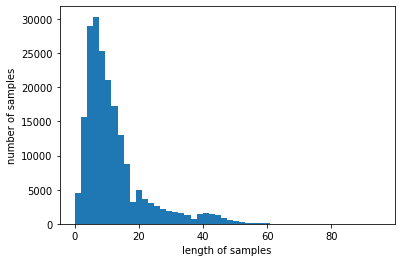

In [47]:
# 리뷰의 길이 분포 확인
print('리뷰의 최대 길이 : ', max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 : ', sum(map(len, tokenized_data))/len(tokenized_data))

plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [48]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size= 100, window=5, min_count=5, workers=4, sg=0)

In [49]:
print(model.wv.vectors.shape)

# 유사도가 구해진다.
print(model.wv.most_similar("최민식"))

(17532, 100)
[('서영희', 0.8510556221008301), ('양동근', 0.84722900390625), ('한석규', 0.8393286466598511), ('박중훈', 0.8391255140304565), ('유다인', 0.833807647228241), ('안성기', 0.8327155113220215), ('메릴', 0.8323080539703369), ('설경구', 0.831449568271637), ('송강호', 0.8308290839195251), ('윤제문', 0.8297772407531738)]


In [50]:
# 유사도가 구해진다.
try:
    print(model.wv.most_similar("영화"))
    print(model.wv.most_similar("뽀로로"))
    print(model.wv.most_similar("정상택"))
except KeyError as err:
    print(type(err), " : ", err)

[('독립영화', 0.6460450291633606), ('공포영화', 0.6255895495414734), ('애니메이션', 0.603717565536499), ('애니', 0.5988434553146362), ('이영화', 0.5509112477302551), ('다큐', 0.5477213263511658), ('작품', 0.5424765944480896), ('다큐멘터리', 0.5373013019561768), ('영화로', 0.5345569849014282), ('액션영화', 0.5292760729789734)]
[('생방', 0.8513489961624146), ('구가의서', 0.8368834257125854), ('잼슴', 0.83672034740448), ('훨신', 0.831436038017273), ('어린이날', 0.8309414982795715), ('히든싱어', 0.8300364017486572), ('네이션', 0.8282161951065063), ('유로트립', 0.8257702589035034), ('해운대', 0.8251721262931824), ('유희왕', 0.8238704204559326)]
<class 'KeyError'>  :  "word '정상택' not in vocabulary"


## 사전에 훈련된 워드 임베딩(한국어)

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import gensim
model = gensim.models.Word2Vec.load('/content/drive/MyDrive/Colab Notebooks/영우_6기_자연어/수업안/dataset/ko.bin')

In [53]:
print(model)

Word2Vec(vocab=30185, size=200, alpha=0.025)


In [54]:
# 상위 10개의 유사도 확인
result = model.wv.most_similar("강아지", topn = 10)
result

[('고양이', 0.7290452718734741),
 ('거위', 0.7185635566711426),
 ('토끼', 0.7056223154067993),
 ('멧돼지', 0.6950401067733765),
 ('엄마', 0.6934334635734558),
 ('난쟁이', 0.6806551218032837),
 ('한마리', 0.6770296096801758),
 ('아가씨', 0.6750352382659912),
 ('아빠', 0.6729634404182434),
 ('목걸이', 0.6512460708618164)]

In [55]:
# 상위 10개의 유사도 확인
result = model.wv.most_similar("우리나라", topn = 10)
result

[('한국', 0.6312342882156372),
 ('동아시아', 0.5565902590751648),
 ('국내', 0.5452646017074585),
 ('한반도', 0.5354500412940979),
 ('동양', 0.5189040899276733),
 ('대한민국', 0.5102909207344055),
 ('학계', 0.5000237822532654),
 ('중국', 0.48603564500808716),
 ('국내외', 0.47242972254753113),
 ('개발도상국', 0.4673701524734497)]

## 사전 훈련된 워드 임베딩(영어)

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/영우_6기_자연어/수업안/dataset/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [60]:
del model

print(model)

NameError: ignored

In [2]:
print(model.similarity('this', 'is'))


0.40797037


In [3]:
# book이란 단어를 표시하기 위해서 300차원의 데이터가 표시
print(model['book'])

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

In [4]:
#유사도 확인
model.most_similar('memory')

[('Memory', 0.6844282150268555),
 ('memories', 0.6138081550598145),
 ('Added_Tarbet', 0.5560144186019897),
 ('Earliest_sporting', 0.5375796556472778),
 ('Flash_memory', 0.5318928360939026),
 ('foam_mattress_topper', 0.5253582000732422),
 ('flash_memory', 0.5221431255340576),
 ('remembering', 0.5171269178390503),
 ('SODIMM_modules', 0.5119421482086182),
 ('components_microprocessors_CPUs', 0.5007408857345581)]

## FastText

n = 3

\<apple>

<ap, app, ppl, ple, le>

subword로 학습

In [5]:
from gensim.models import FastText

In [10]:
model = FastText(corpus, size=100, window=5, min_count=5, workers=4, sg=1)

In [14]:
from gensim.models import Word2Vec
model_wv = Word2Vec(sentences = corpus, size = 100, window=5, min_count=5, workers=4, sg=0)

In [16]:
# voca에 없기 때문에 에러 발생
model_wv.wv.most_similar("electrofishing") # word2vec

KeyError: ignored

In [18]:
# 그러나 FastText에서는 정상 동작
model.wv.most_similar("electrofishing") # FastText

[('electric', 0.8980148434638977),
 ('electrode', 0.8815633058547974),
 ('electricity', 0.8784457445144653),
 ('electrodes', 0.8726990222930908),
 ('electronics', 0.8414382934570312),
 ('electrons', 0.8406700491905212),
 ('electronic', 0.8371757864952087),
 ('electron', 0.8290570974349976),
 ('aircraft', 0.8220039010047913),
 ('electrical', 0.8157689571380615)]

# Glove

In [19]:
!pip install glove_python_binary

     |████████████████████████████████| 948 kB 5.2 MB/s 


In [20]:
from glove import Corpus, Glove

In [21]:
Corpus = Corpus()

In [22]:
Corpus.fit(corpus, window=5)

In [23]:
glove = Glove(no_components=100, learning_rate=0.05)

In [24]:
# 훈련 
glove.fit(Corpus.matrix, epochs=10, no_threads=4, verbose=True)
glove.add_dictionary(Corpus.dictionary)

Performing 10 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


In [25]:
print(glove.most_similar("man"))

[('dog', 0.9726923511940511), ('child', 0.9672966704849082), ('person', 0.9401019531515691), ('patient', 0.9362959417573021)]


In [26]:
print(glove.most_similar("boy"))

[('harmless', 0.9870652971568675), ('negotiation', 0.9867024303469653), ('cocker', 0.9865942073011463), ('vertebrate', 0.9863921078084796)]


In [27]:
print(glove.most_similar("university"))

[('moon', 0.9749783340354686), ('state', 0.9668057177335989), ('nation', 0.9645418949965973), ('biggest', 0.9545034947152398)]
